# LIFE EXPECTANCY

### importing the necessary data processing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
import warnings
warnings.filterwarnings('ignore')
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,...,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,Afghanistan,2014,Developing,59.90,271.00,64,0.01,73.52,62.00,492,...,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,Afghanistan,2013,Developing,59.90,268.00,66,0.01,73.22,64.00,430,...,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,Afghanistan,2012,Developing,59.50,272.00,69,0.01,78.18,67.00,2787,...,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,Afghanistan,2011,Developing,59.20,275.00,71,0.01,7.10,68.00,3013,...,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


In [3]:
df.shape

(2938, 22)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.00,2007.52,4.61,2000.00,2004.00,2008.00,2012.00,2015.00
Life expectancy,2928.00,69.22,9.52,36.30,63.10,72.10,75.70,89.00
Adult Mortality,2928.00,164.80,124.29,1.00,74.00,144.00,228.00,723.00
infant deaths,2938.00,30.30,117.93,0.00,0.00,3.00,22.00,1800.00
Alcohol,2744.00,4.60,4.05,0.01,0.88,3.75,7.70,17.87
percentage expenditure,2938.00,738.25,1987.91,0.00,4.69,64.91,441.53,19479.91
Hepatitis B,2385.00,80.94,25.07,1.00,77.00,92.00,97.00,99.00
Measles,2938.00,2419.59,11467.27,0.00,0.00,17.00,360.25,212183.00
BMI,2904.00,38.32,20.04,1.00,19.30,43.50,56.20,87.30
under-five deaths,2938.00,42.04,160.45,0.00,0.00,4.00,28.00,2500.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().mean()*100

Country                            0.00
Year                               0.00
Status                             0.00
Life expectancy                    0.34
Adult Mortality                    0.34
infant deaths                      0.00
Alcohol                            6.60
percentage expenditure             0.00
Hepatitis B                       18.82
Measles                            0.00
 BMI                               1.16
under-five deaths                  0.00
Polio                              0.65
Total expenditure                  7.69
Diphtheria                         0.65
 HIV/AIDS                          0.00
GDP                               15.25
Population                        22.19
 thinness  1-19 years              1.16
 thinness 5-9 years                1.16
Income composition of resources    5.68
Schooling                          5.55
dtype: float64

In [8]:
df.ffill(inplace=True)

In [9]:
df.isnull().mean()*100

Country                           0.00
Year                              0.00
Status                            0.00
Life expectancy                   0.00
Adult Mortality                   0.00
infant deaths                     0.00
Alcohol                           0.00
percentage expenditure            0.00
Hepatitis B                       0.00
Measles                           0.00
 BMI                              0.00
under-five deaths                 0.00
Polio                             0.00
Total expenditure                 0.00
Diphtheria                        0.00
 HIV/AIDS                         0.00
GDP                               0.00
Population                        0.00
 thinness  1-19 years             0.00
 thinness 5-9 years               0.00
Income composition of resources   0.00
Schooling                         0.00
dtype: float64

In [10]:
# Renaming the columns
df.rename(columns={'Life expectancy ':'Life_Expectancy'}, inplace=True)

### Now I am performing some EDA on dataset

### data visualisation

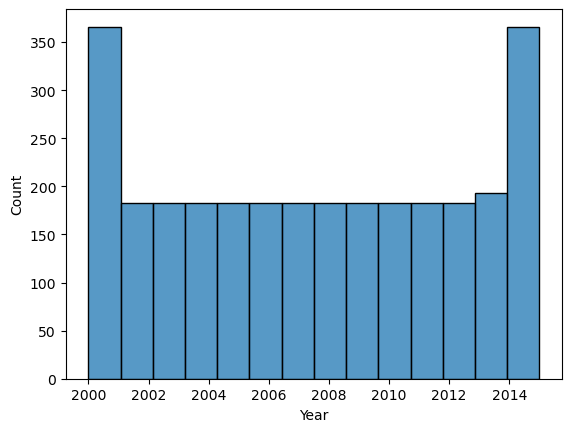

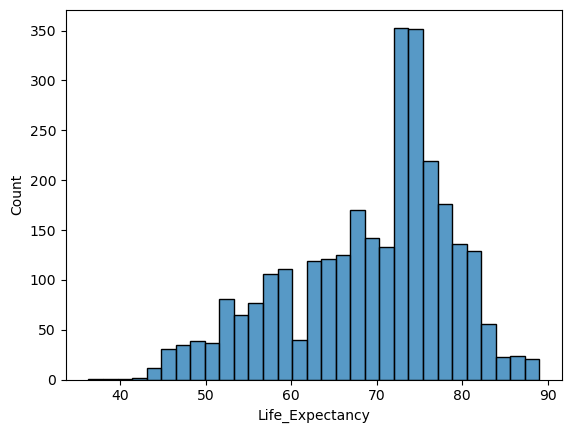

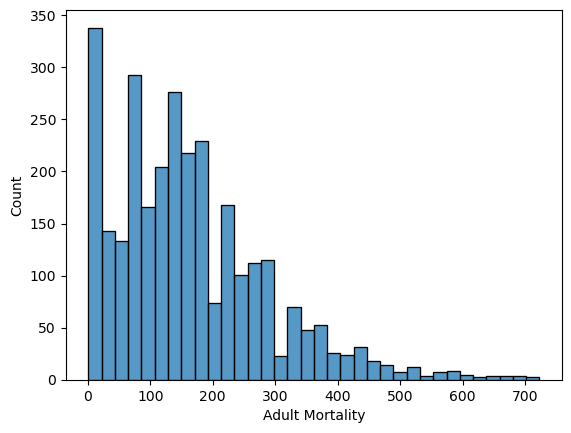

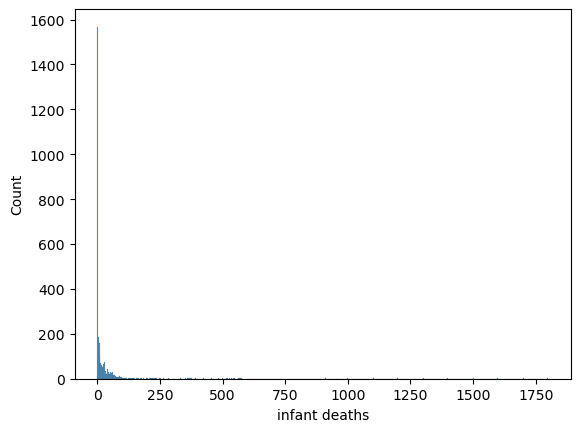

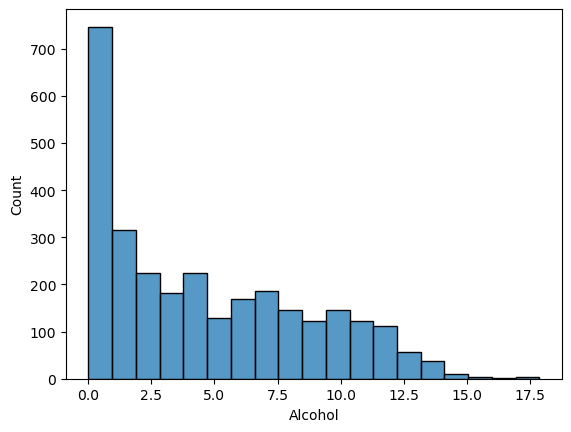

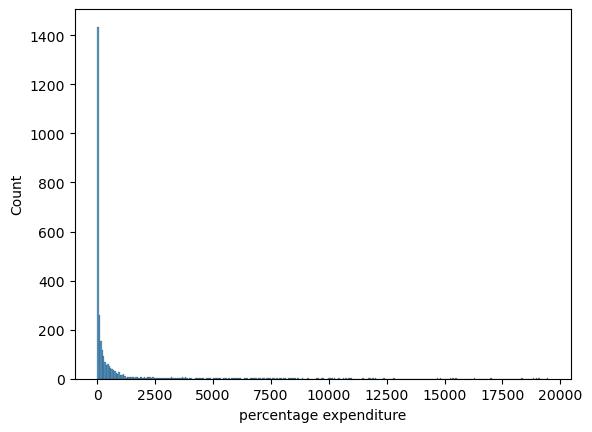

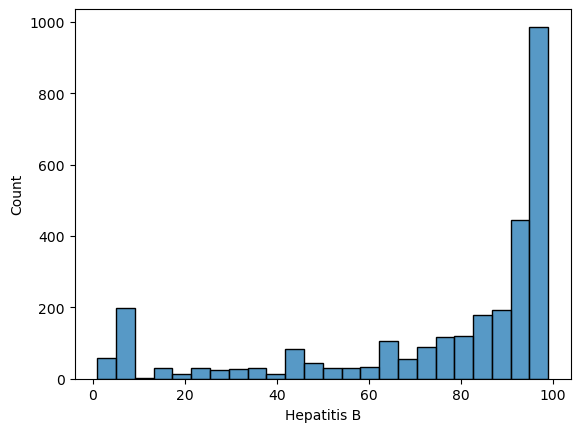

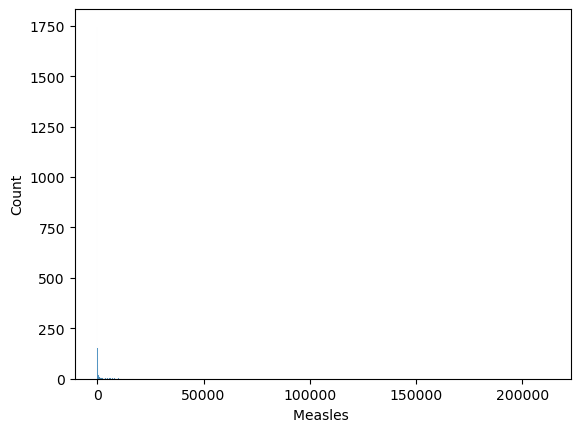

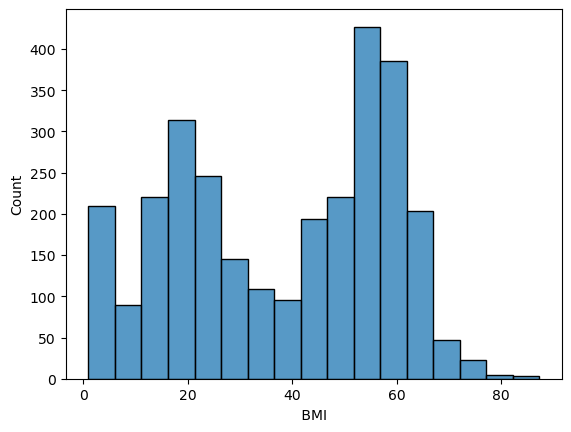

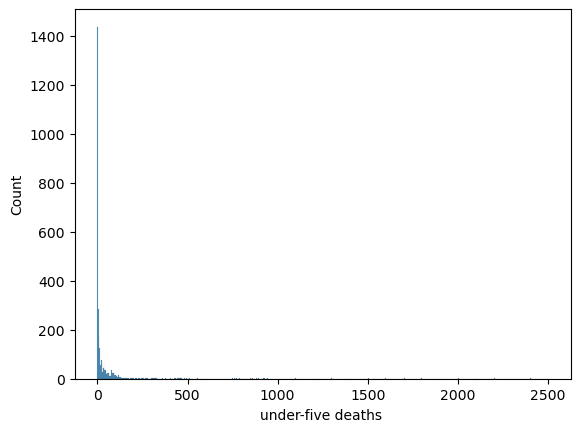

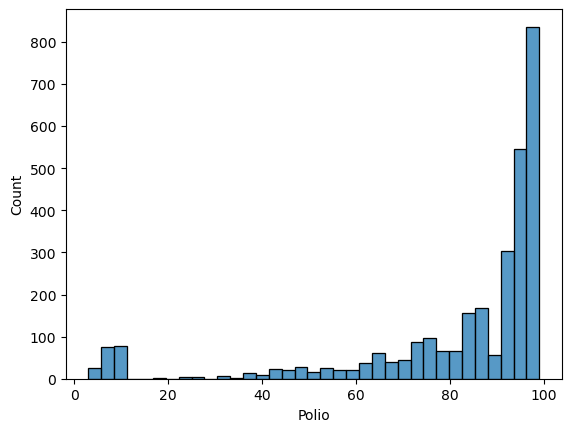

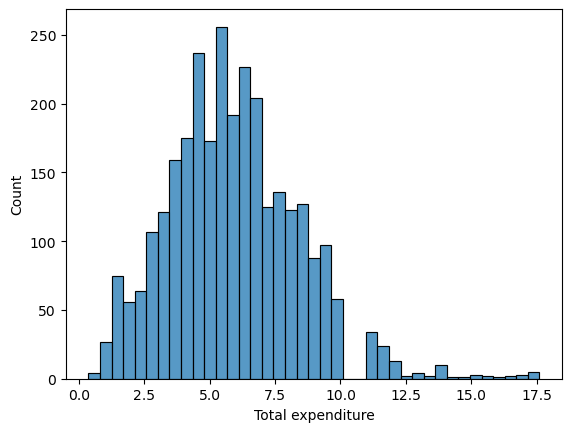

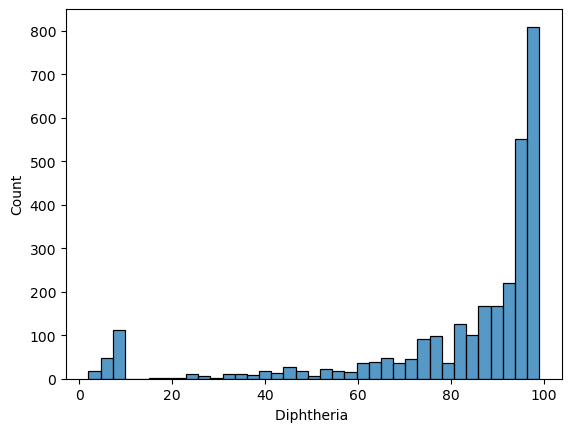

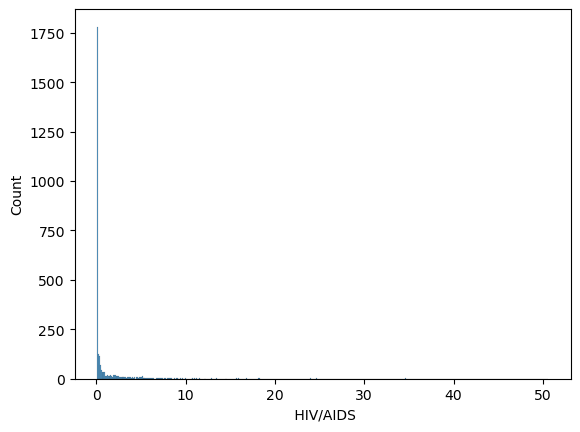

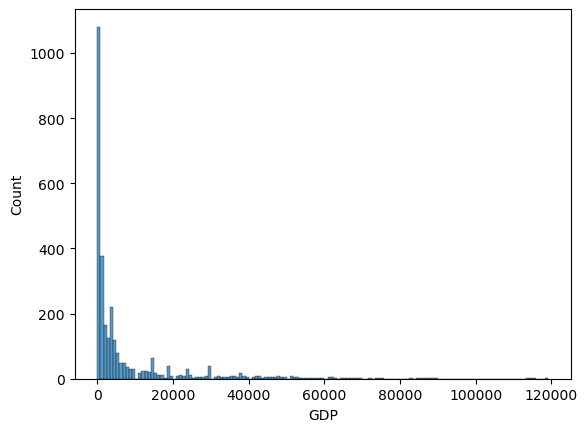

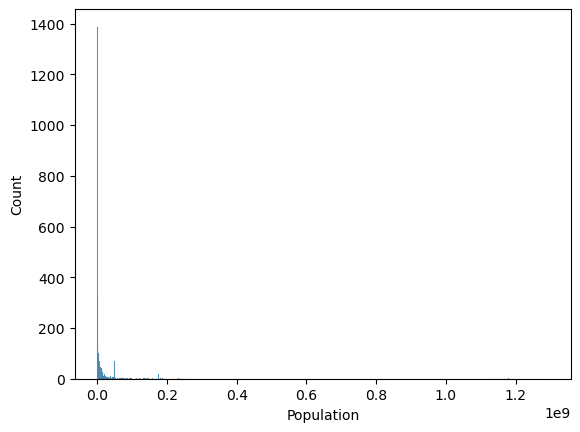

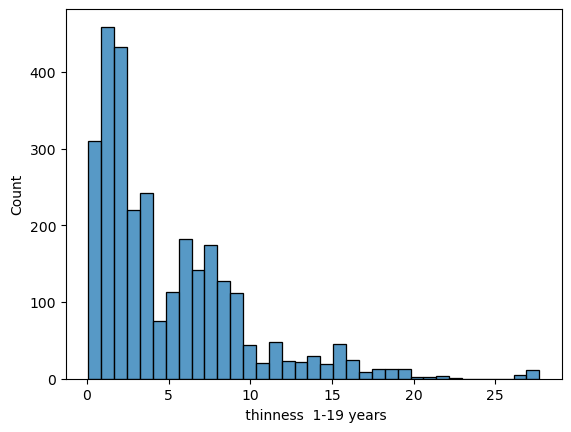

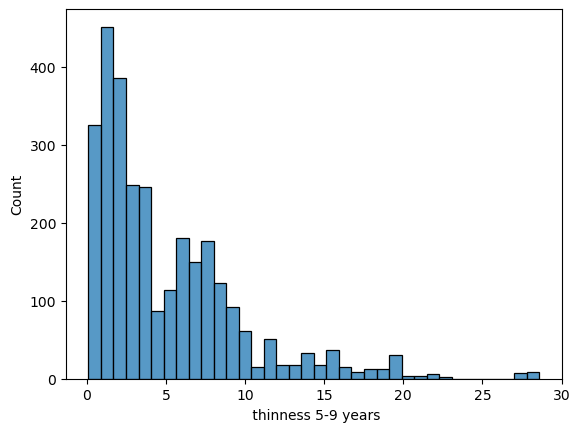

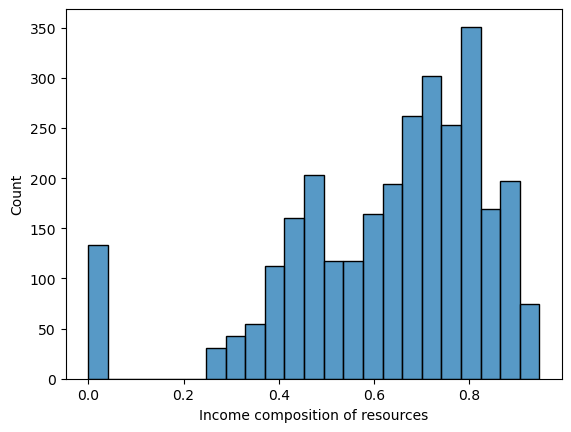

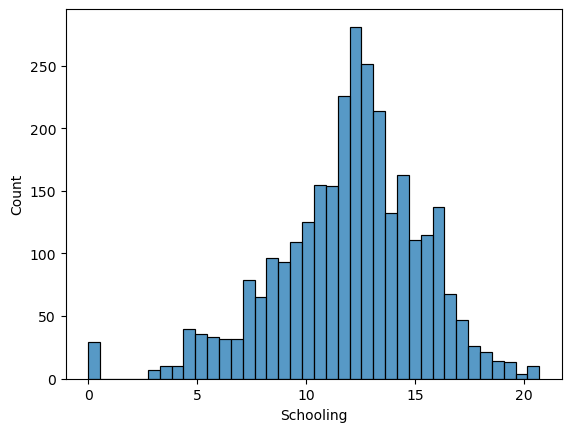

In [11]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show()

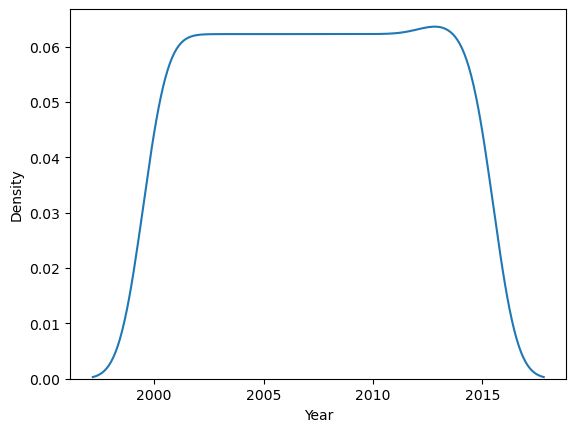

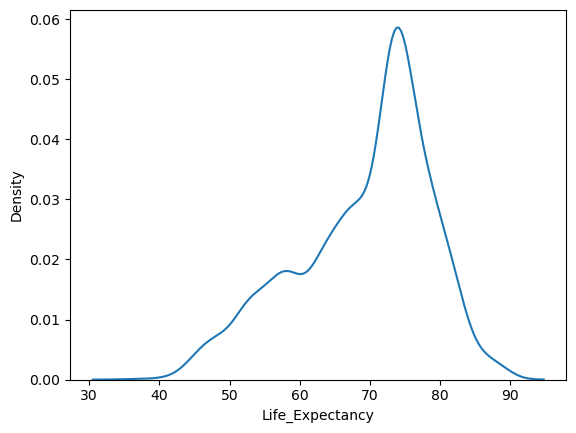

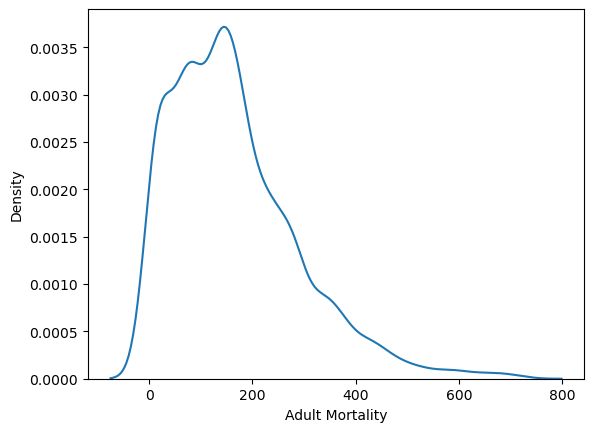

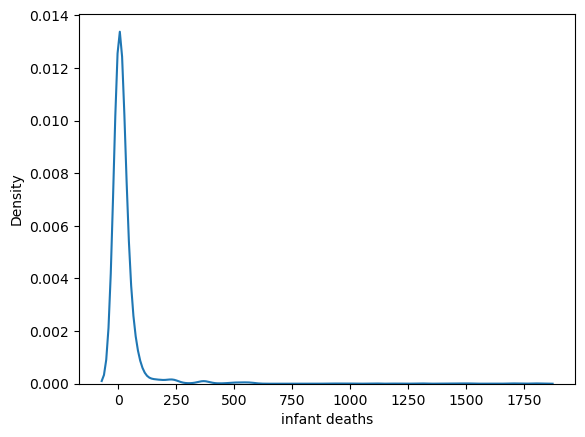

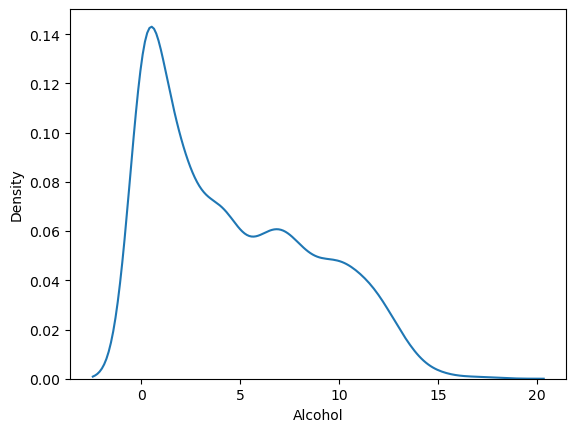

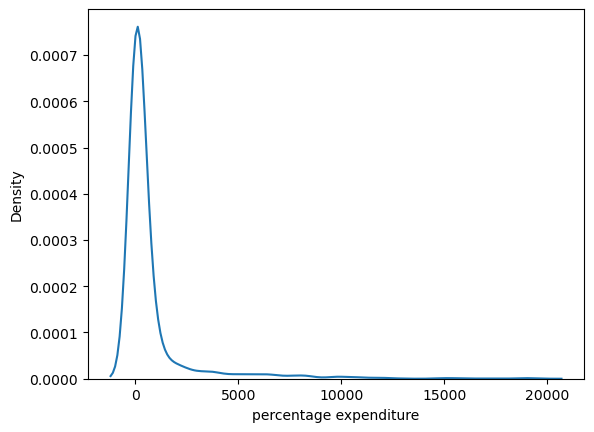

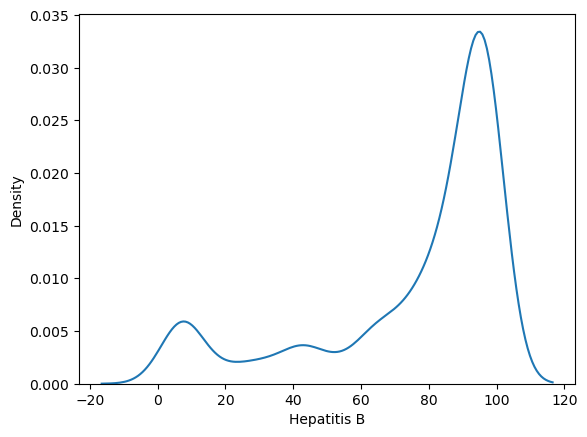

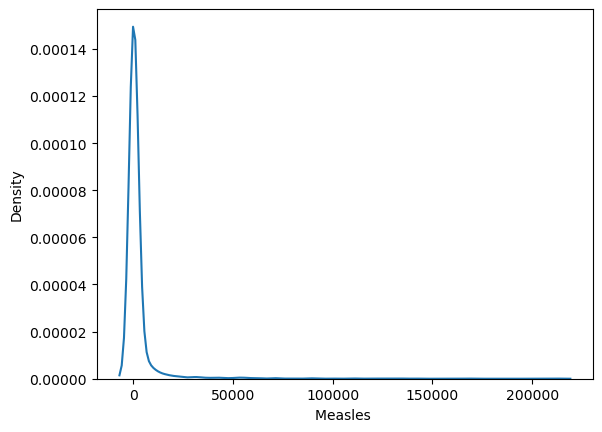

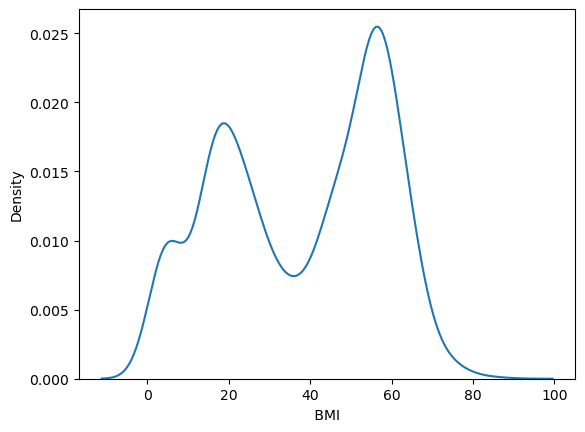

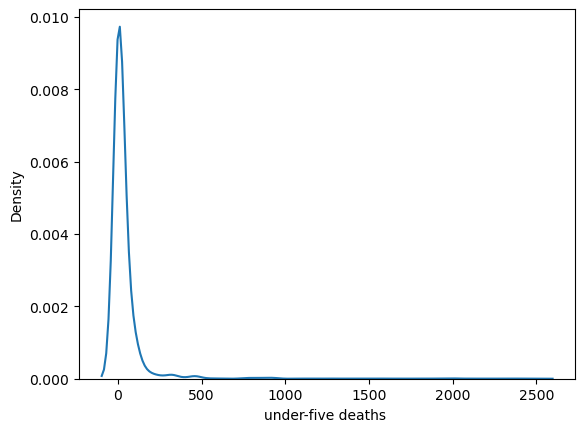

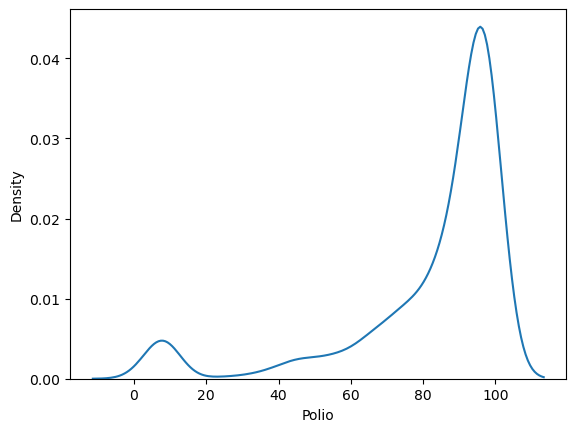

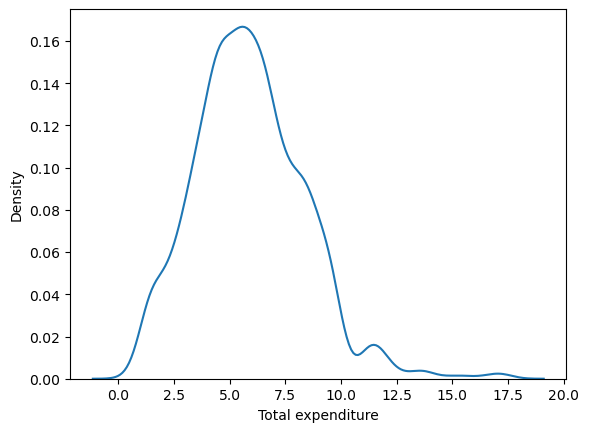

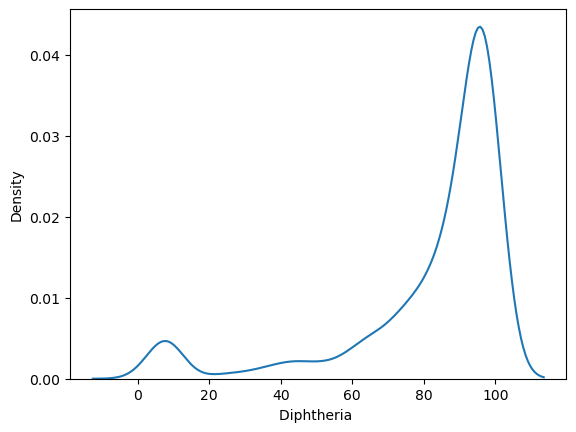

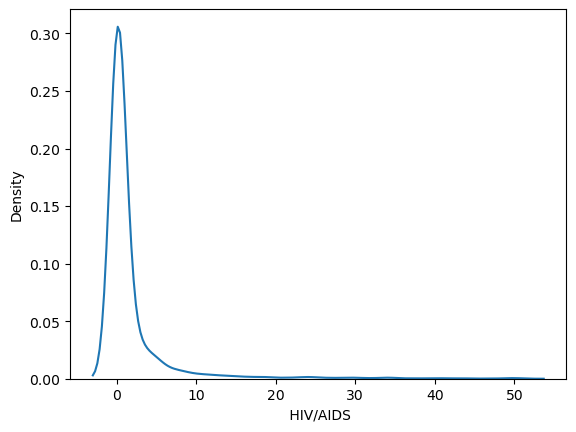

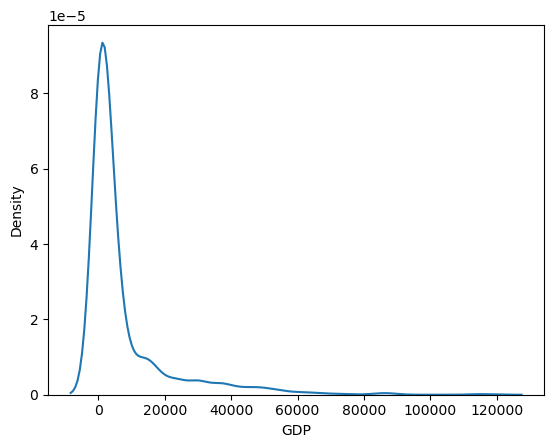

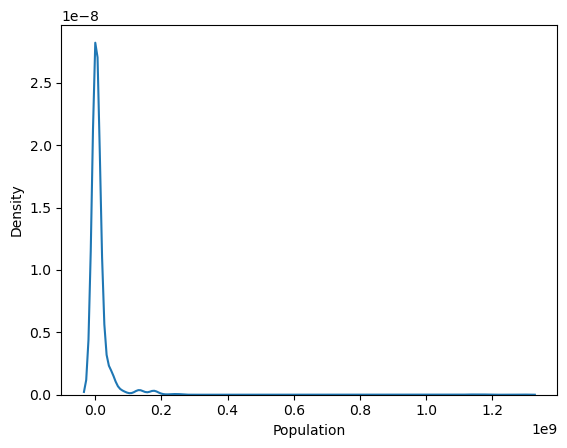

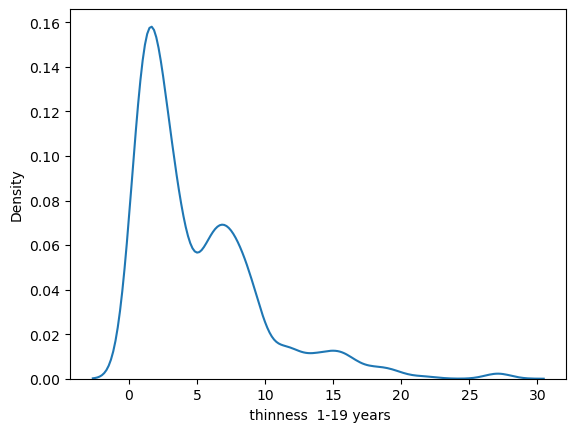

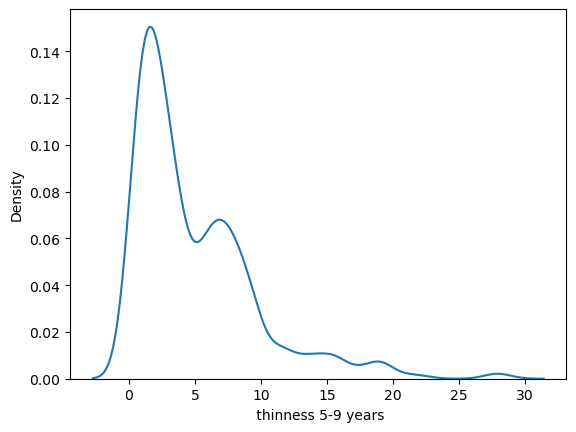

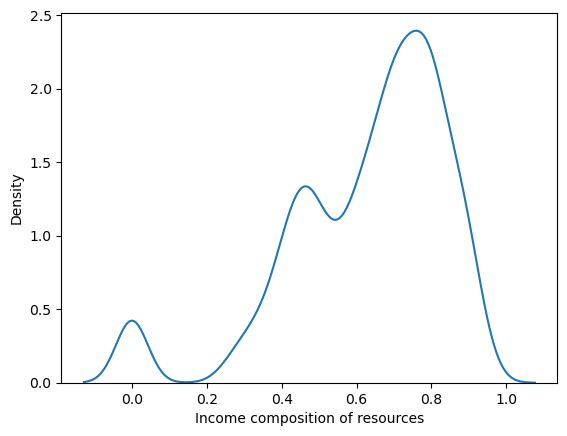

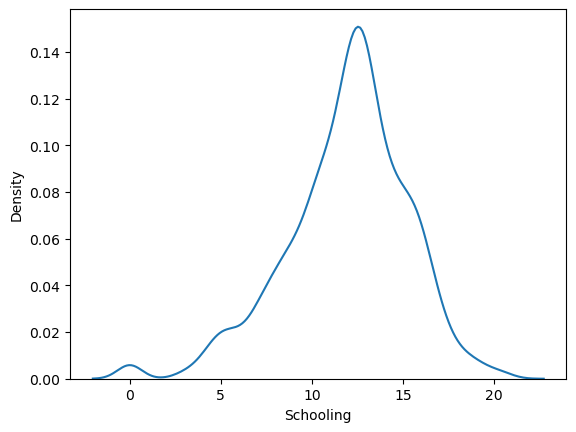

In [12]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show()

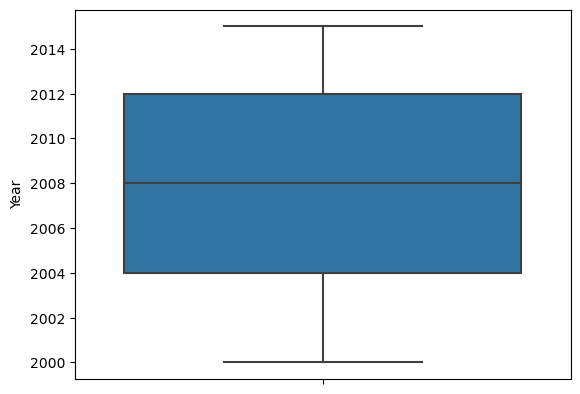

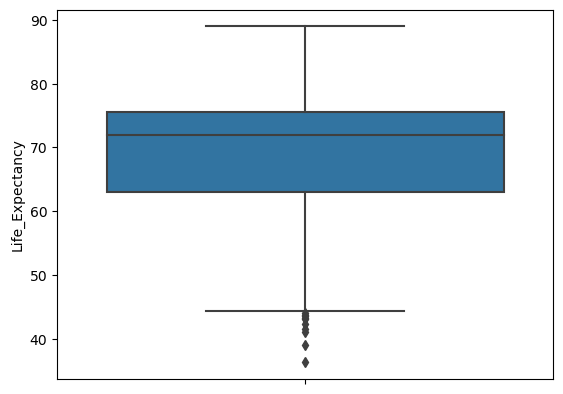

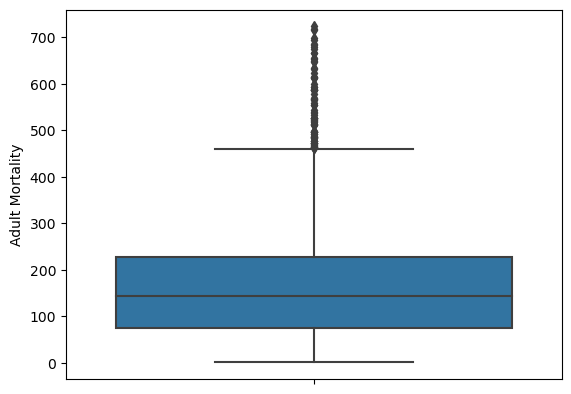

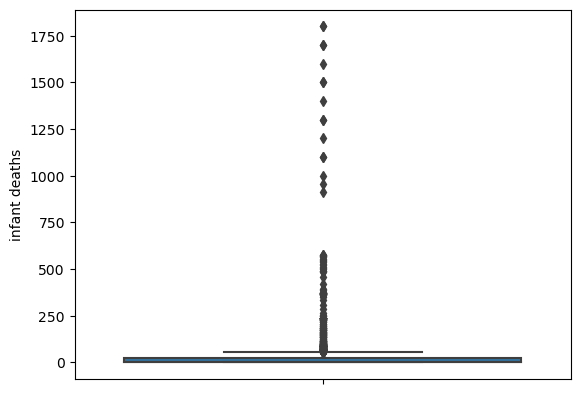

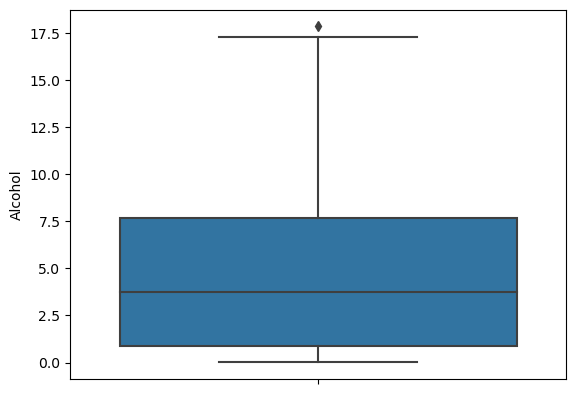

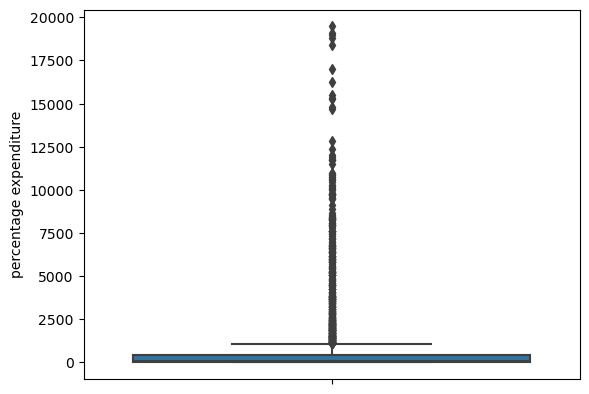

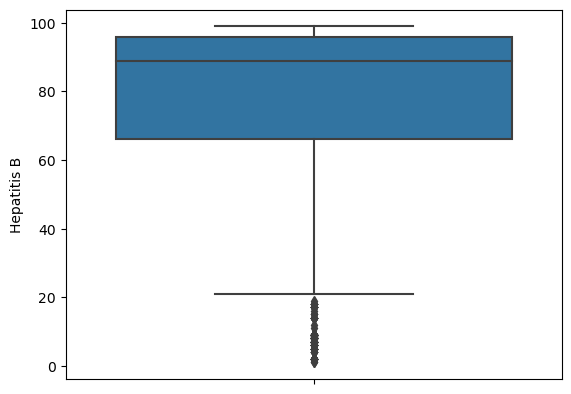

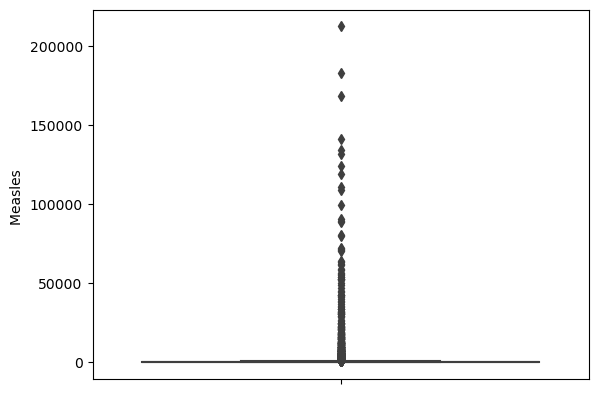

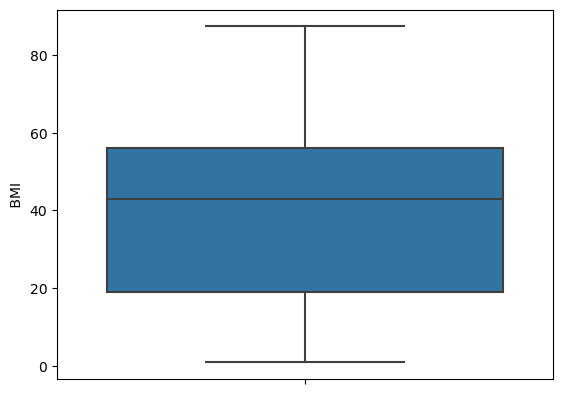

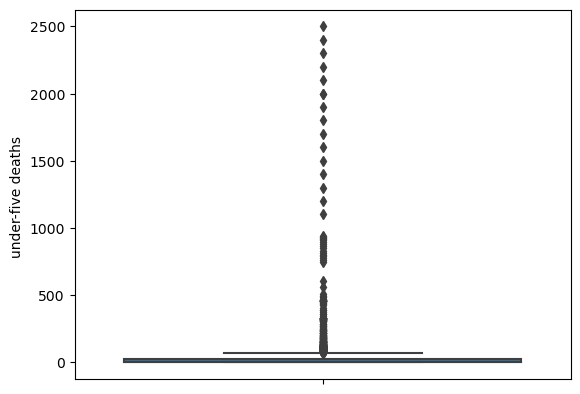

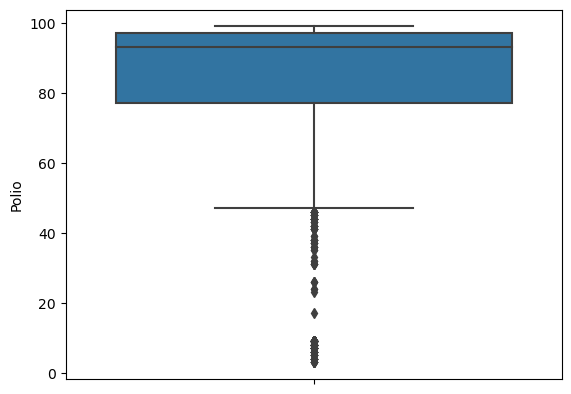

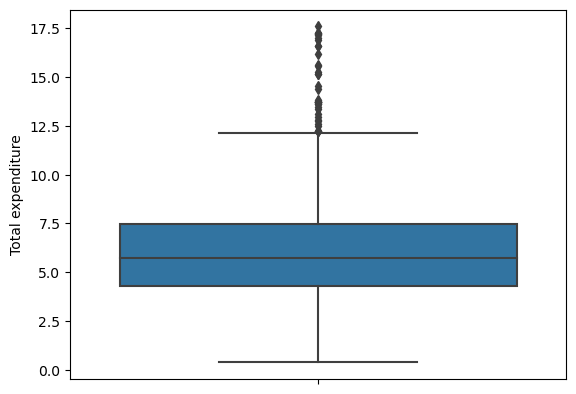

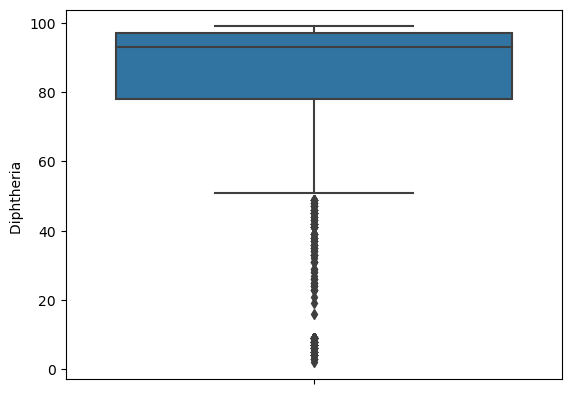

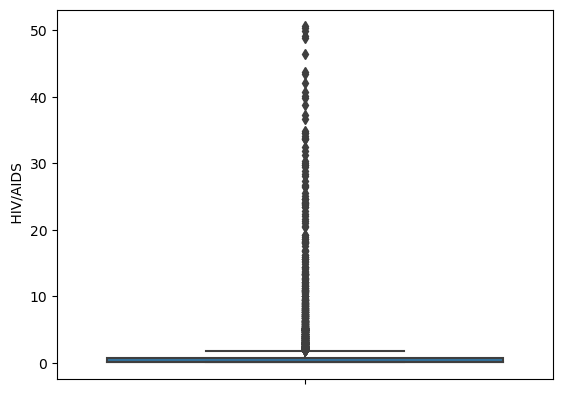

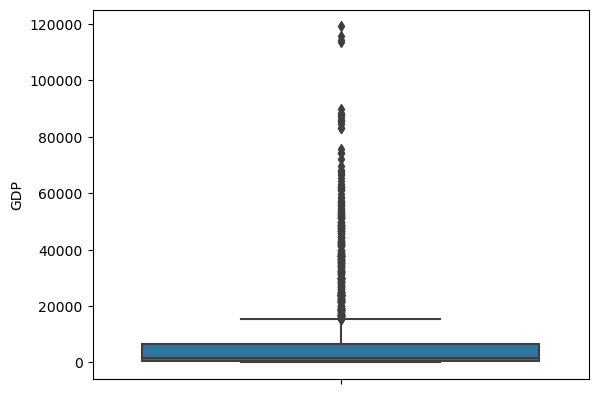

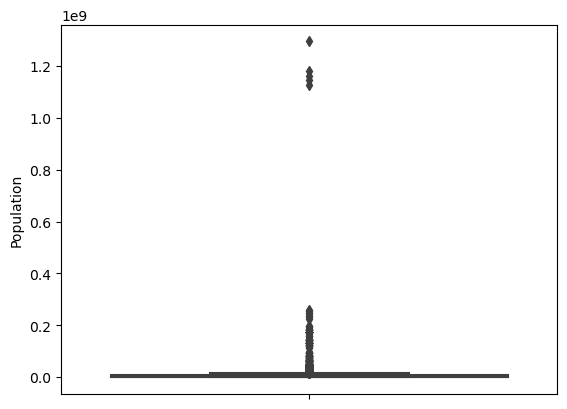

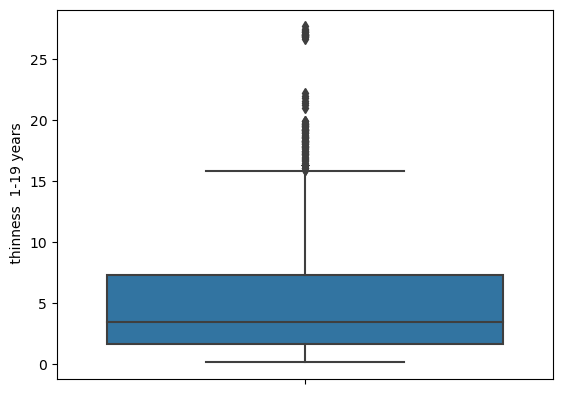

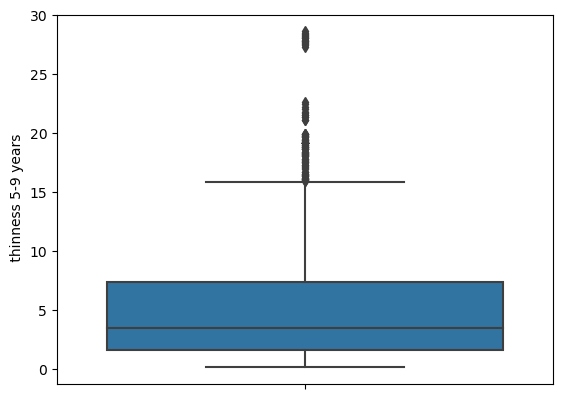

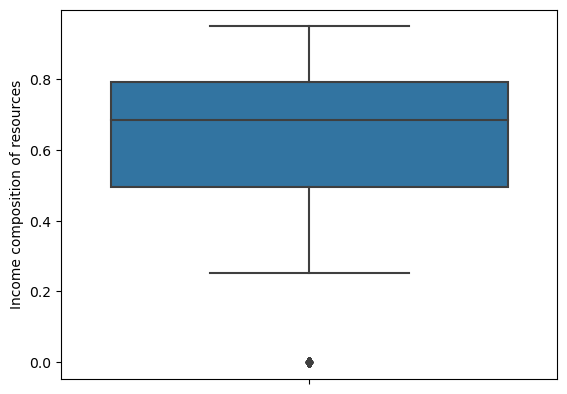

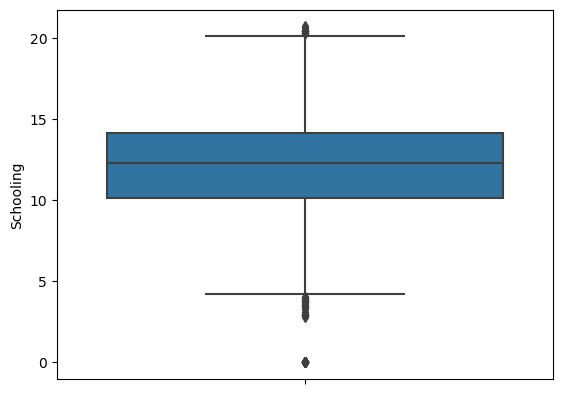

In [13]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

### Treating outliers

In [14]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [15]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

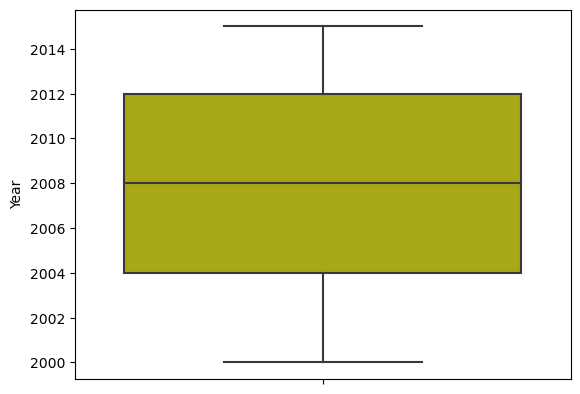

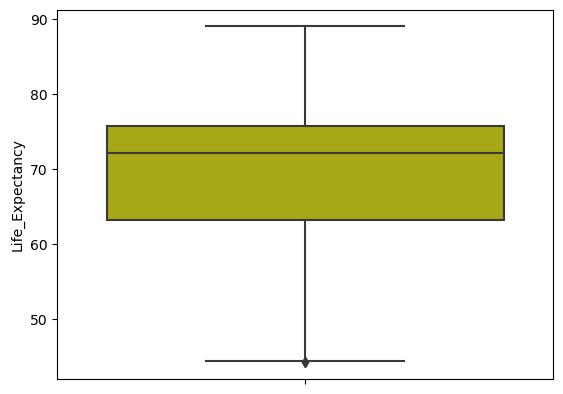

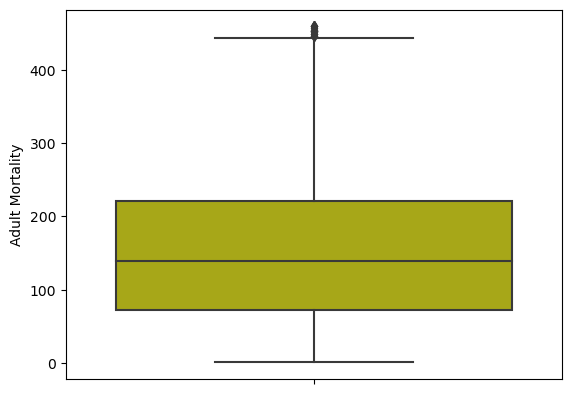

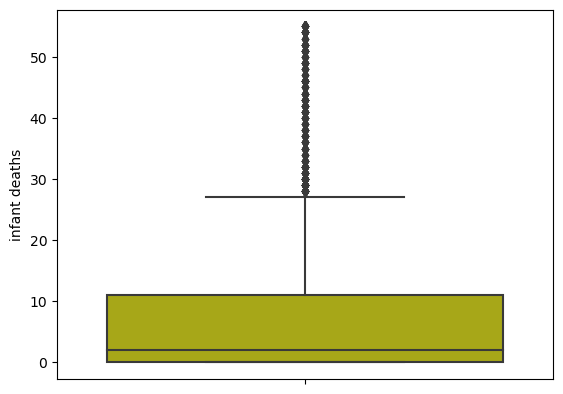

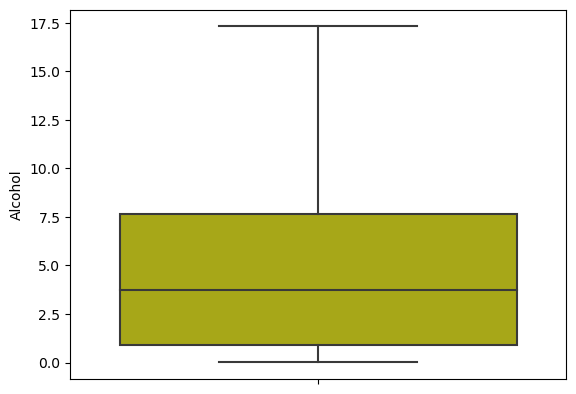

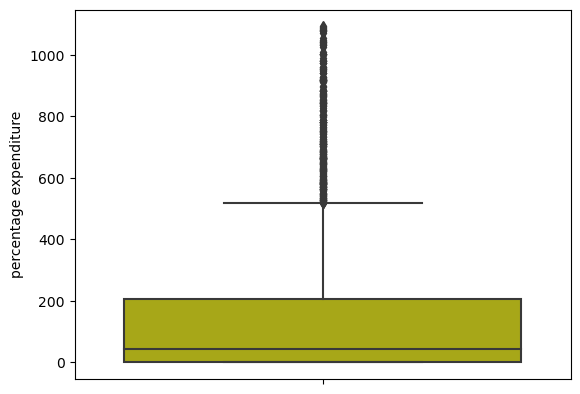

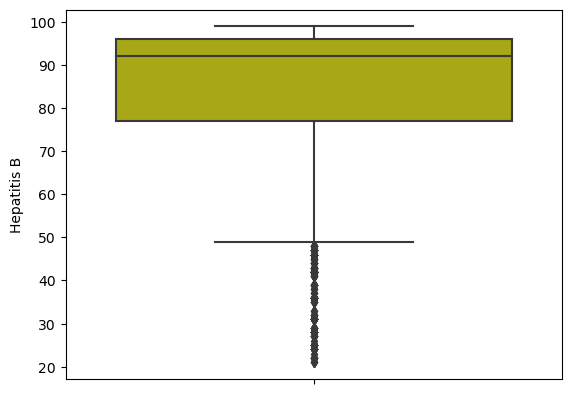

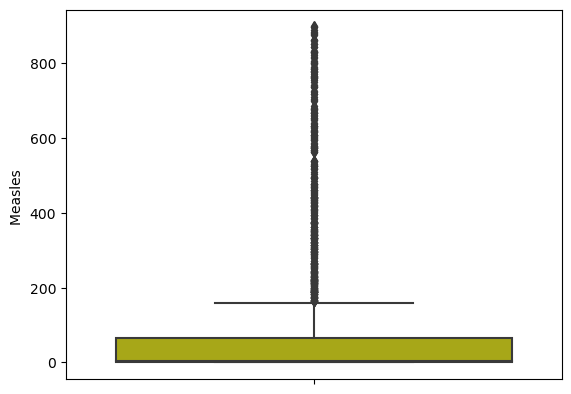

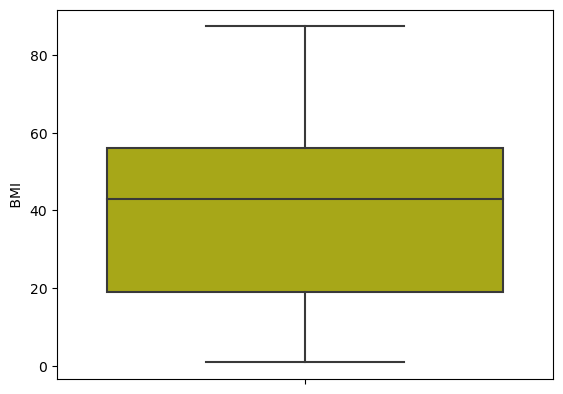

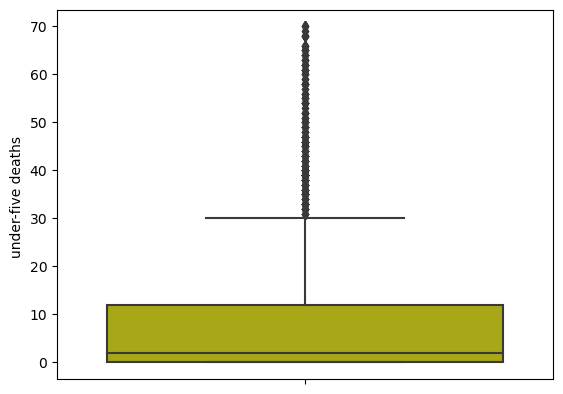

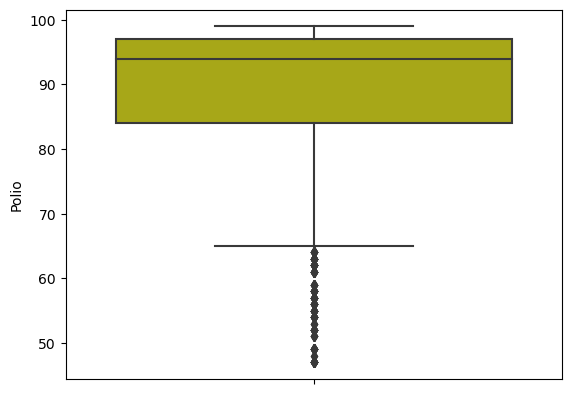

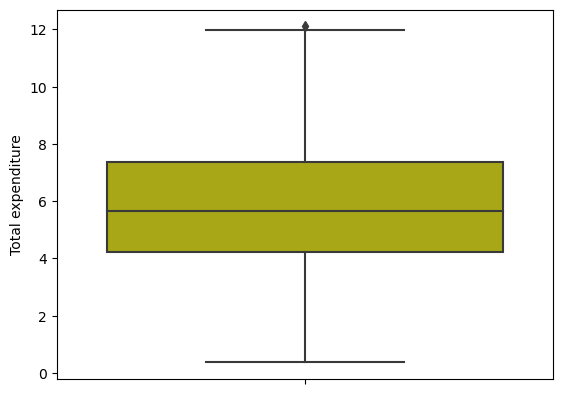

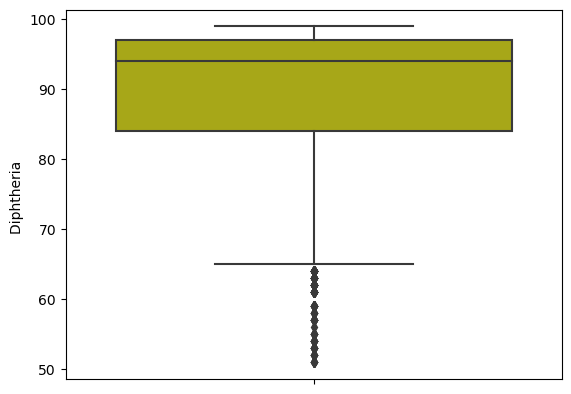

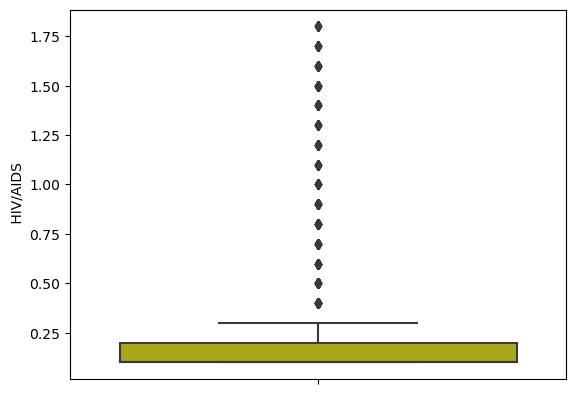

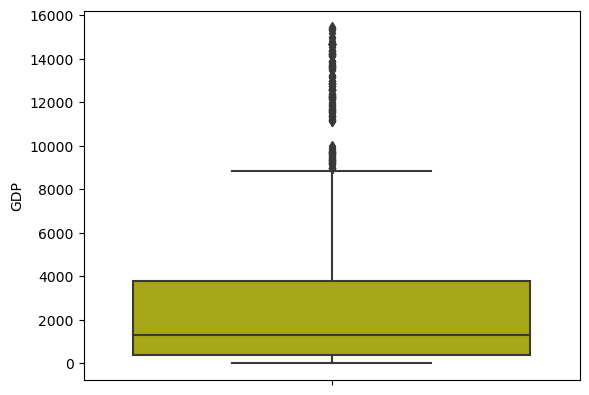

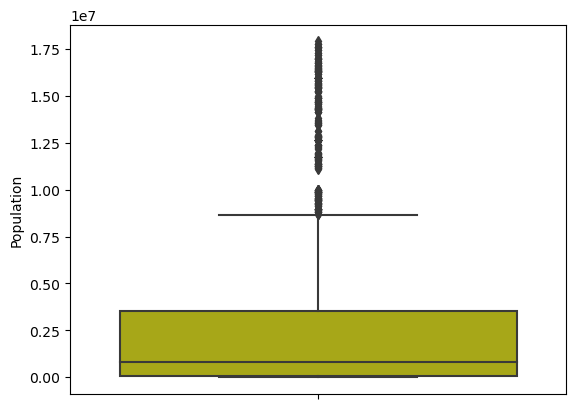

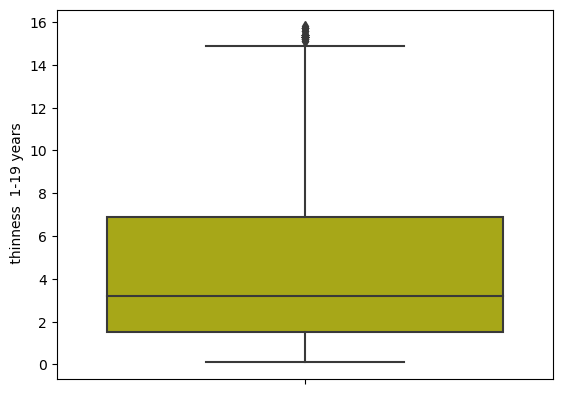

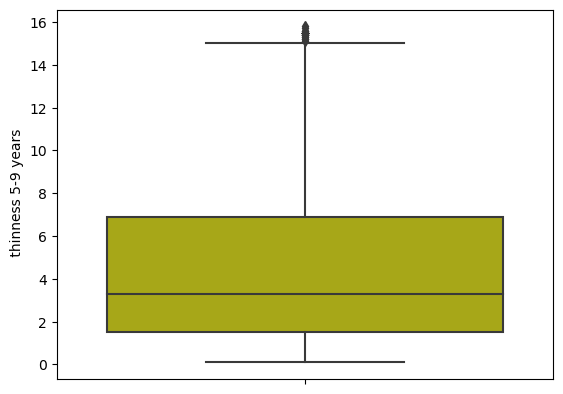

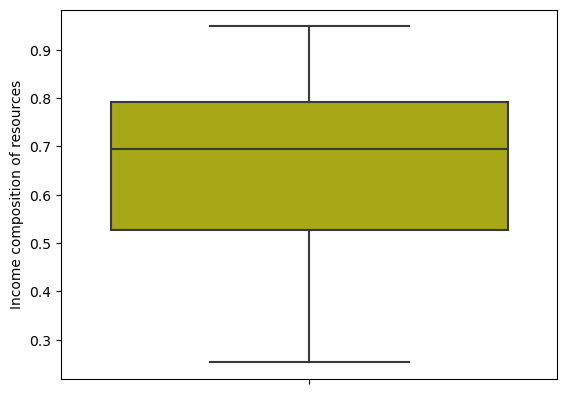

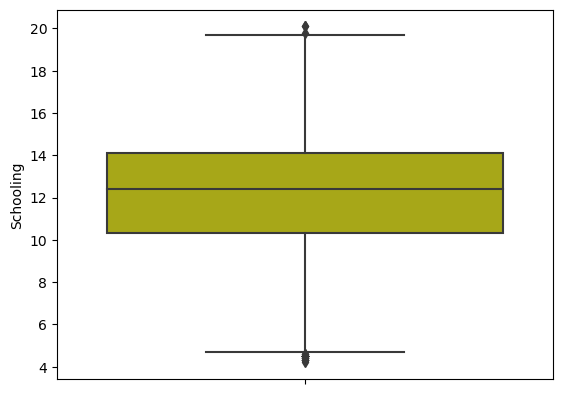

In [16]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='y')
        plt.show()

In [17]:
df.dropna(inplace=True)

Note: The number of non binary numerical features is very large (20), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


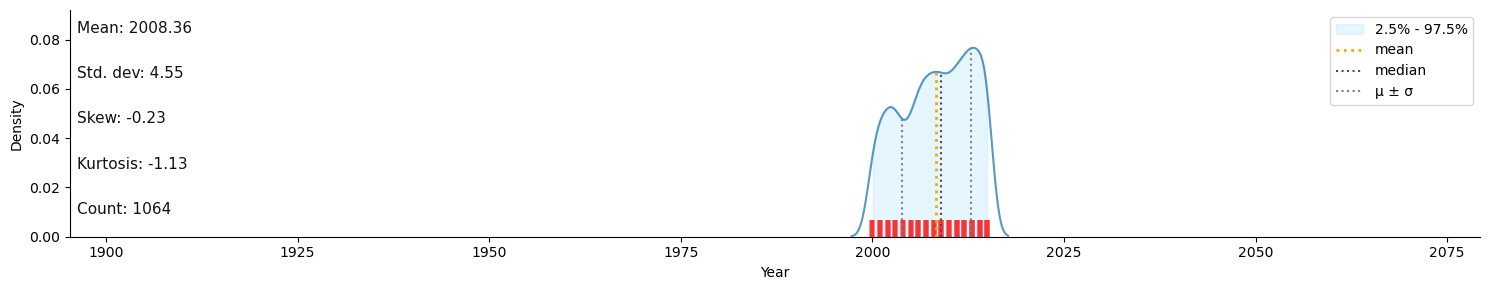

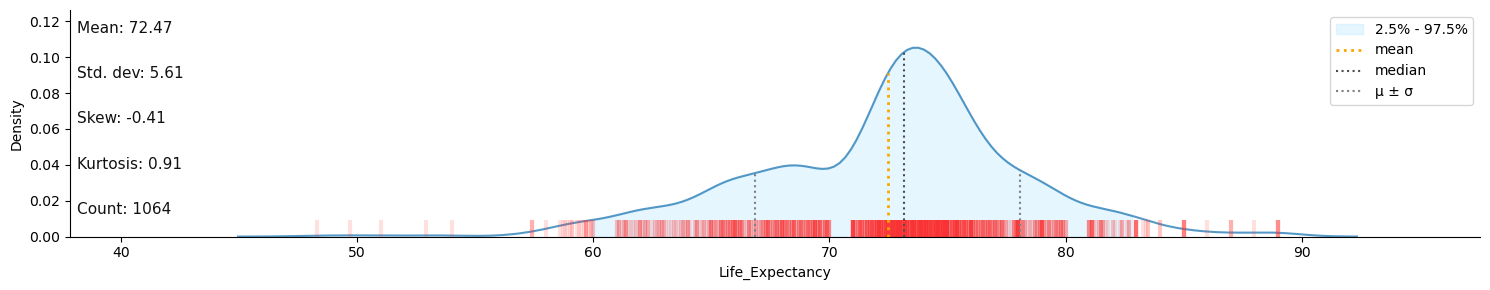

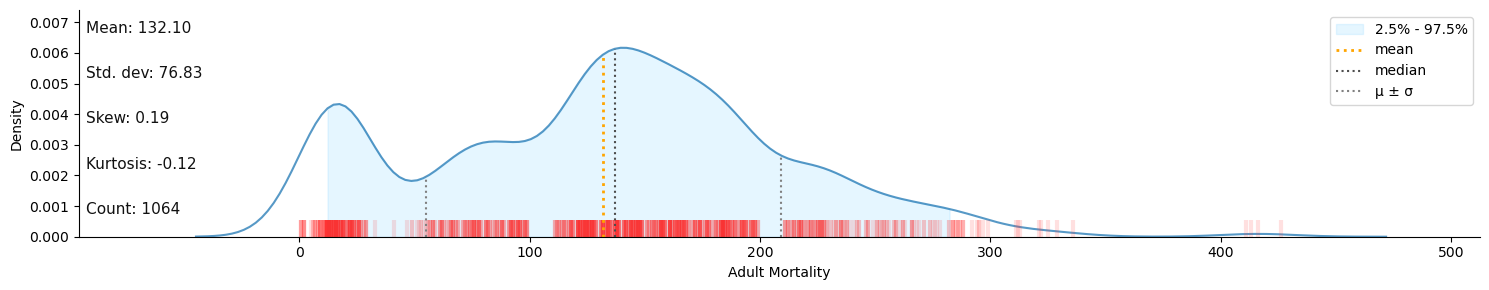

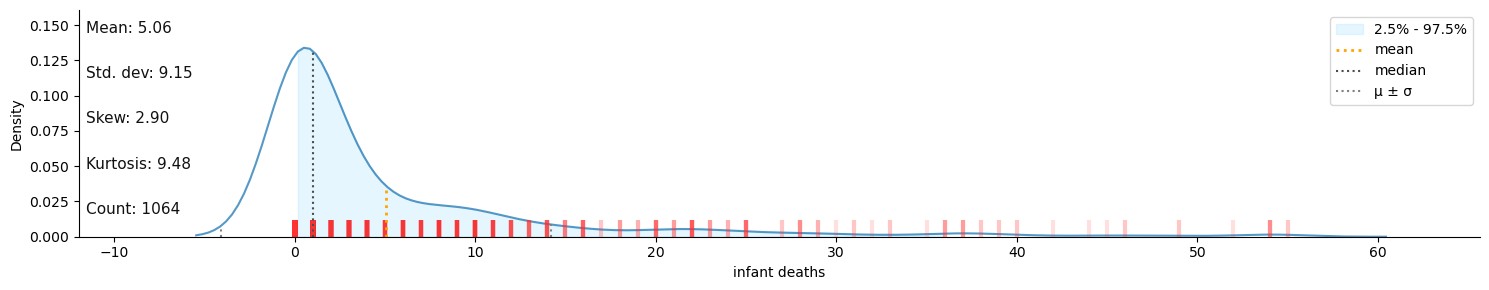

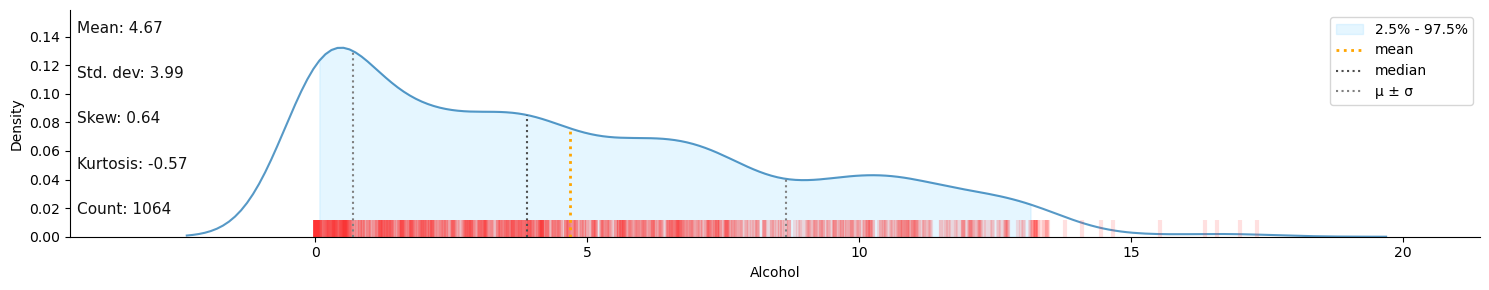

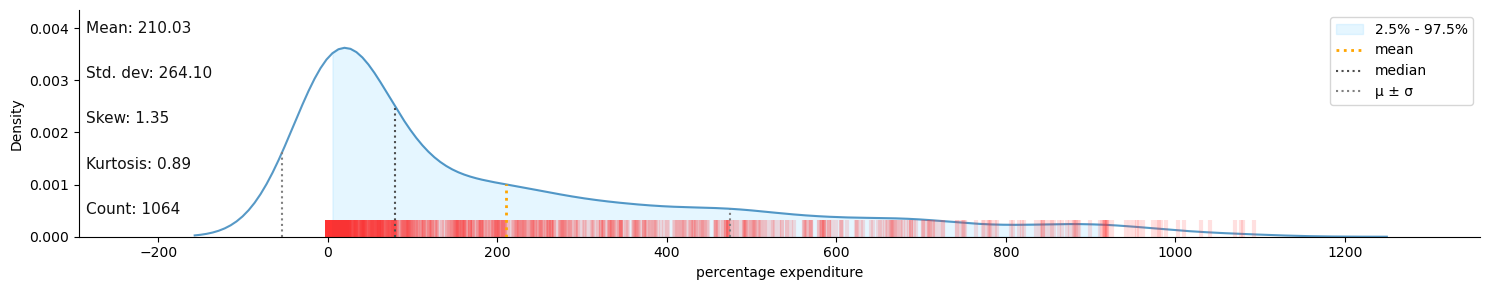

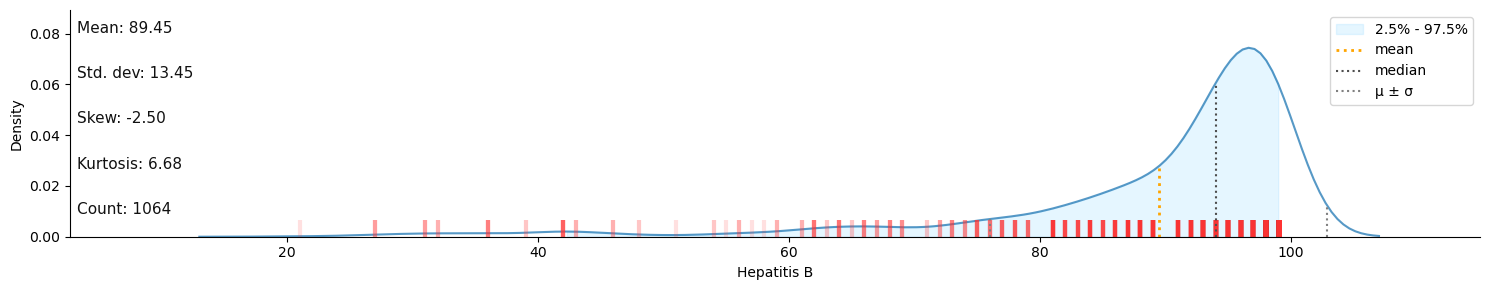

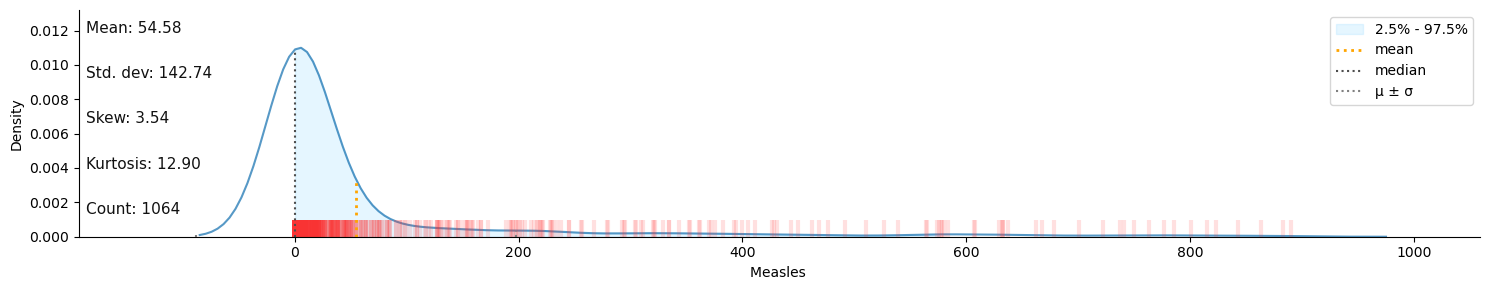

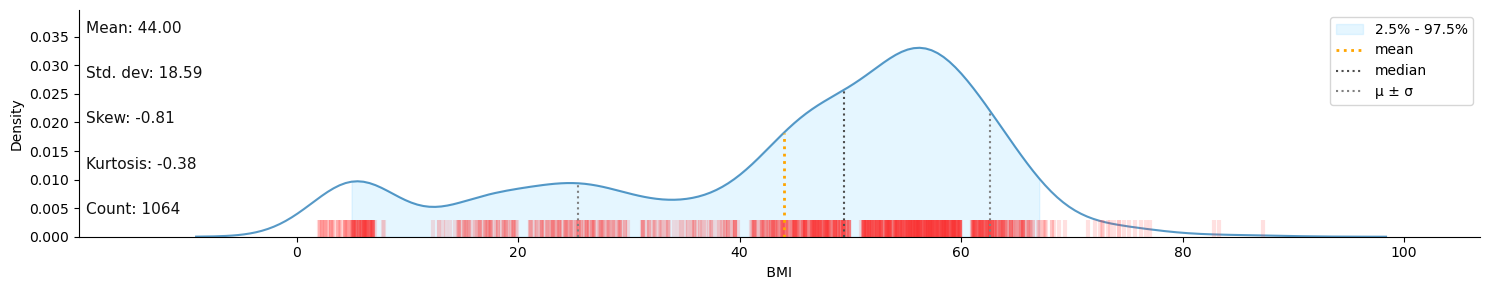

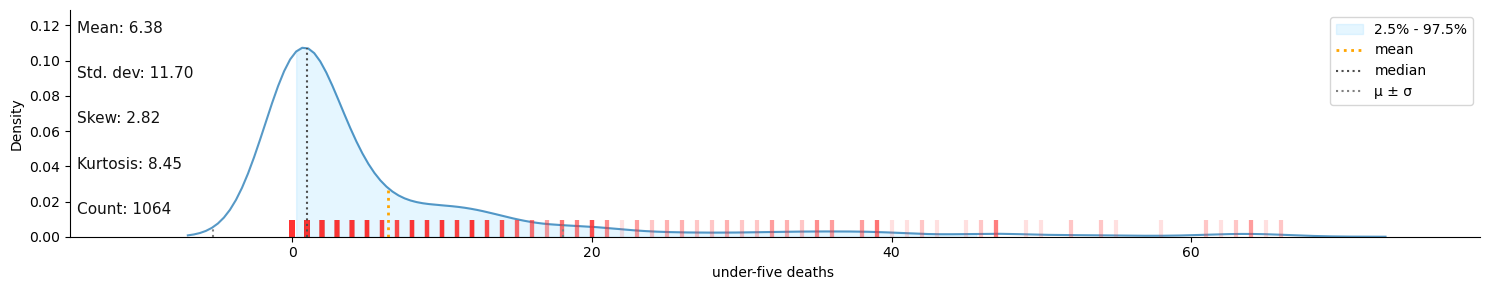

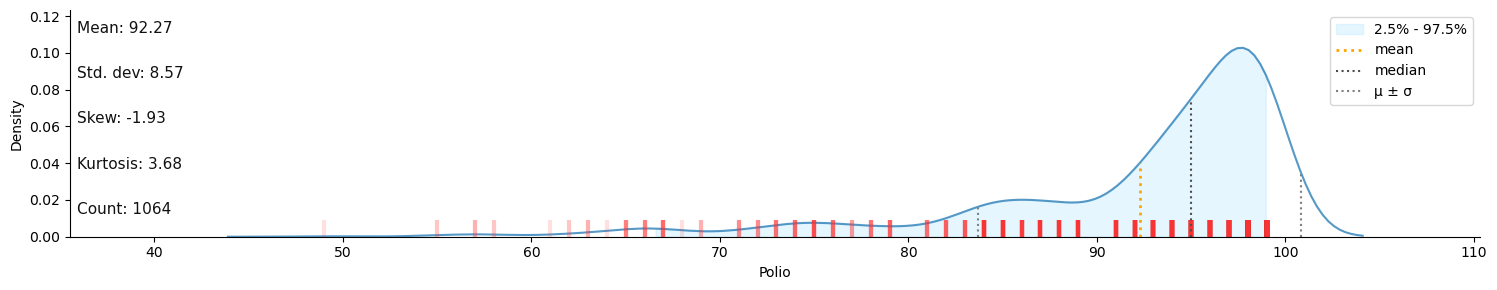

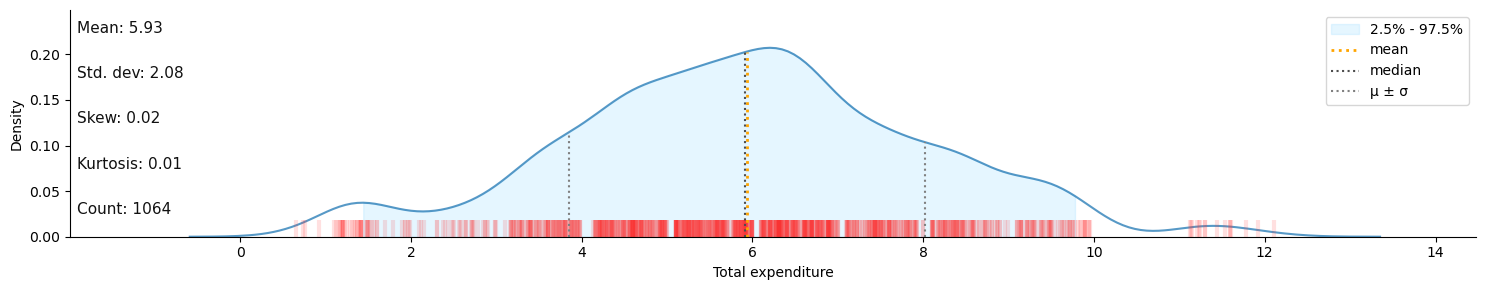

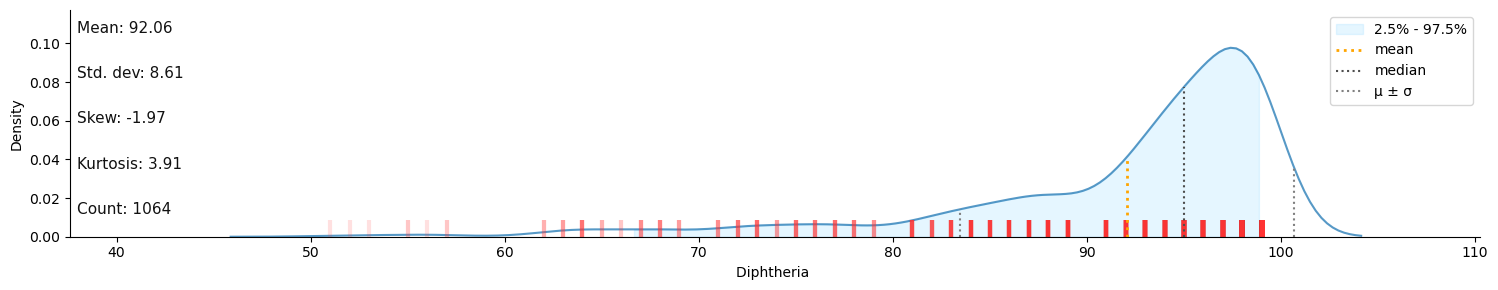

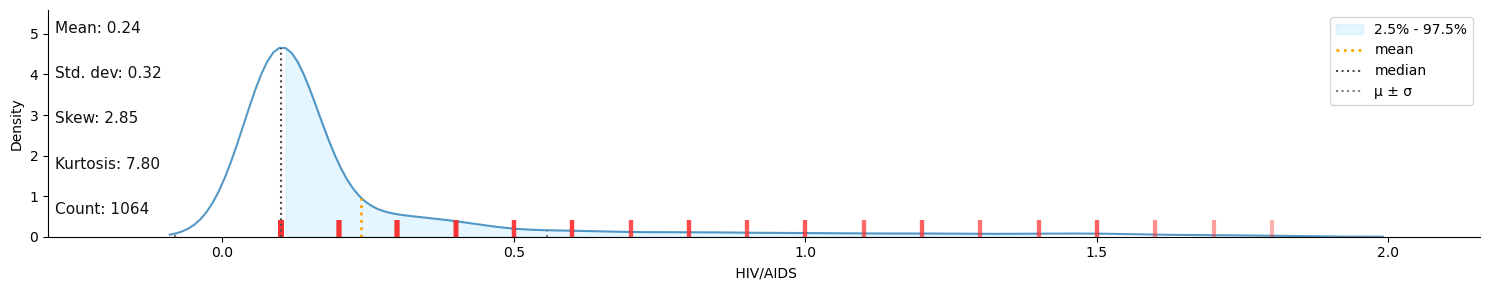

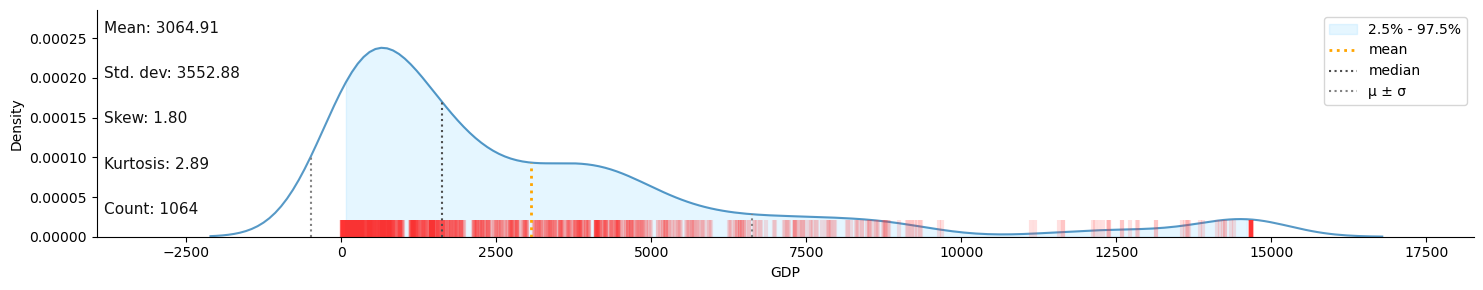

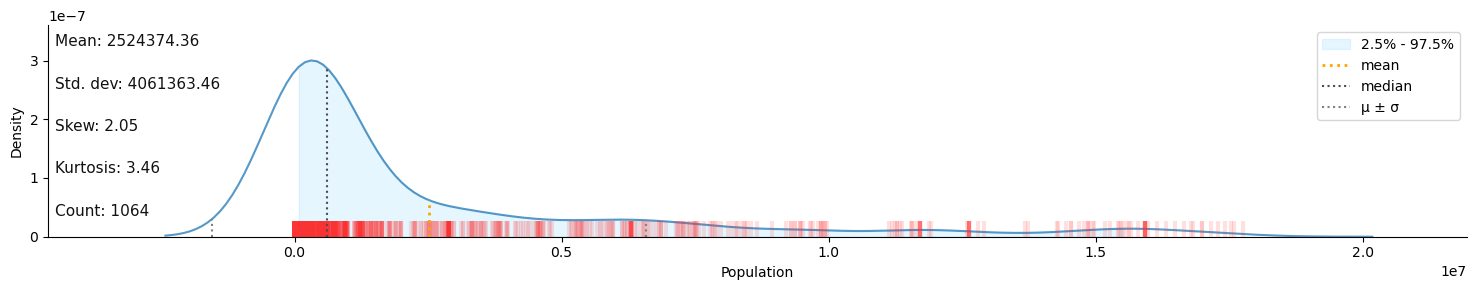

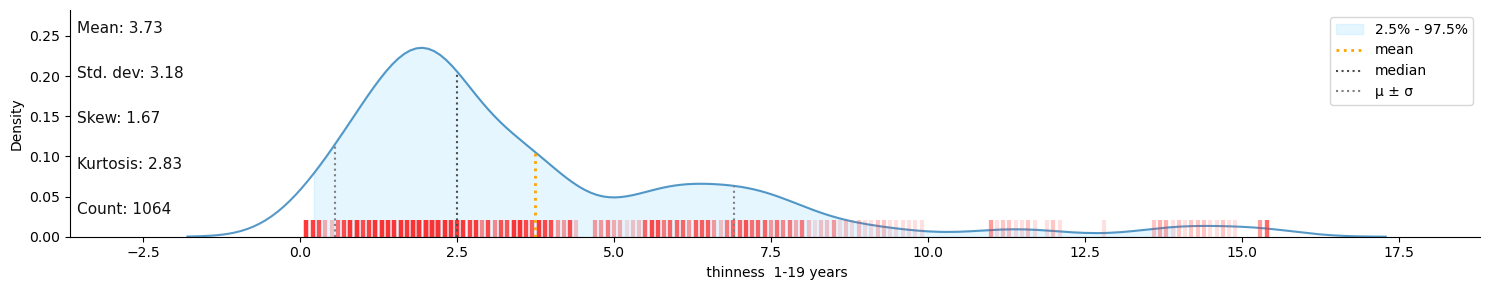

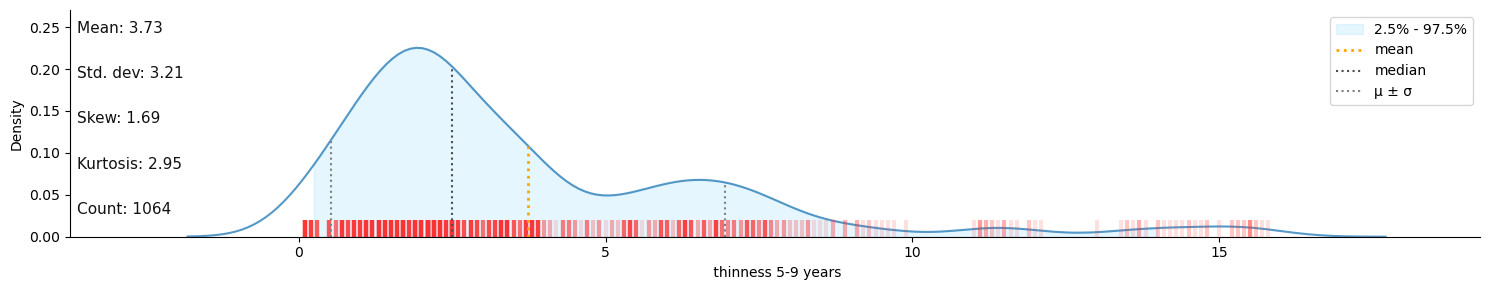

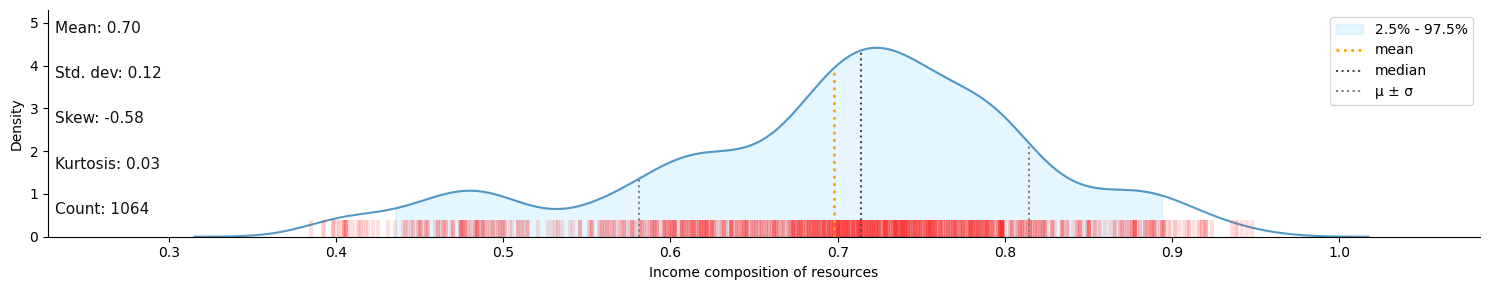

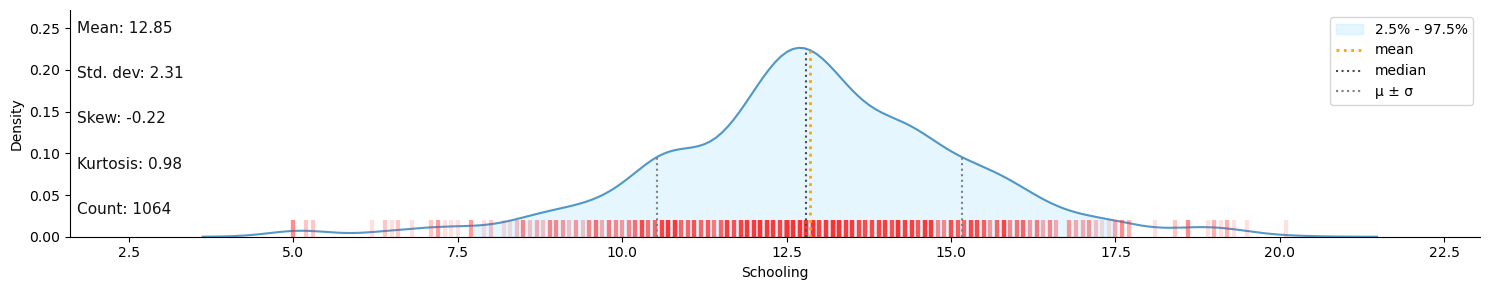

In [18]:
k.dist_plot(data=df);

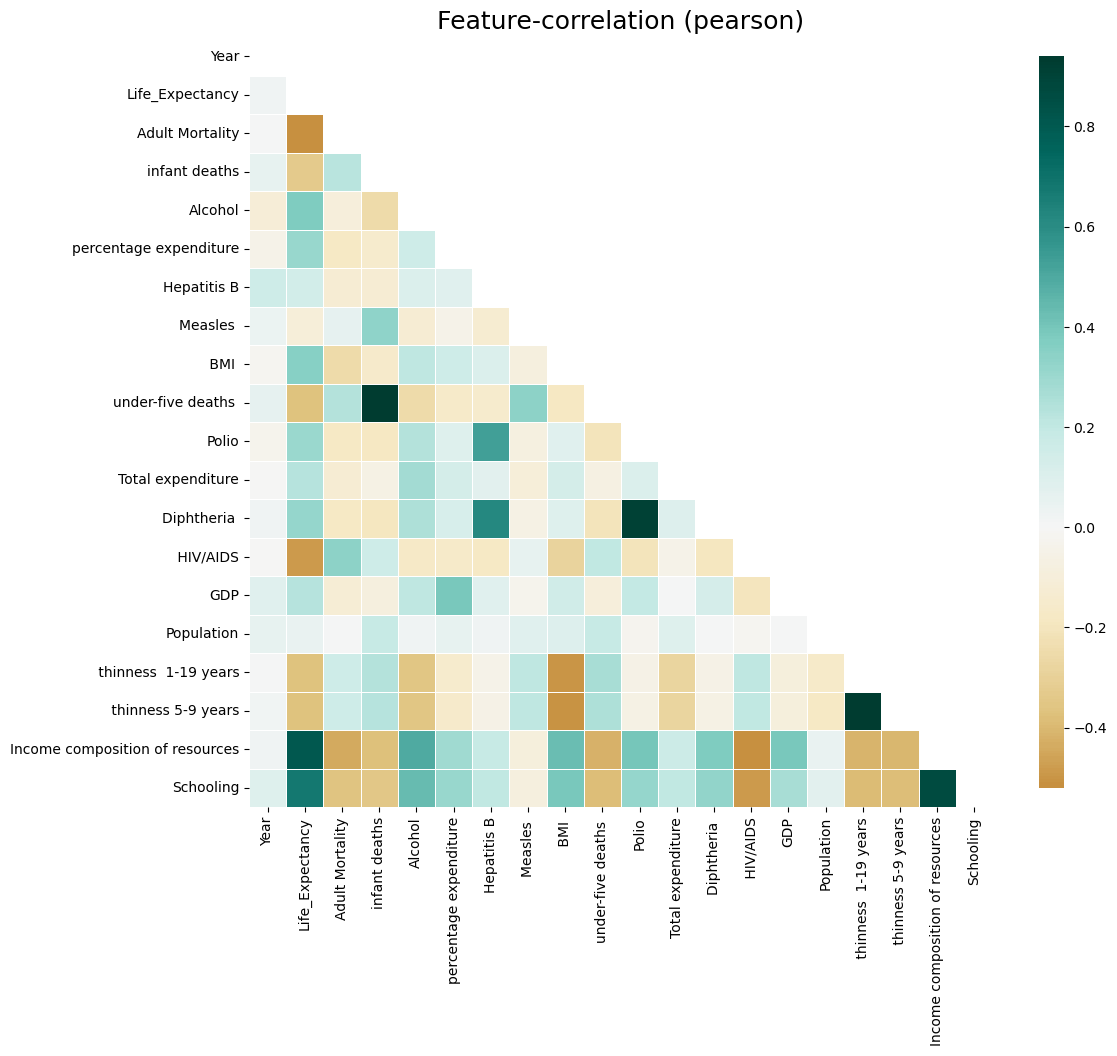

In [19]:
k.corr_plot(data=df,annot=False);

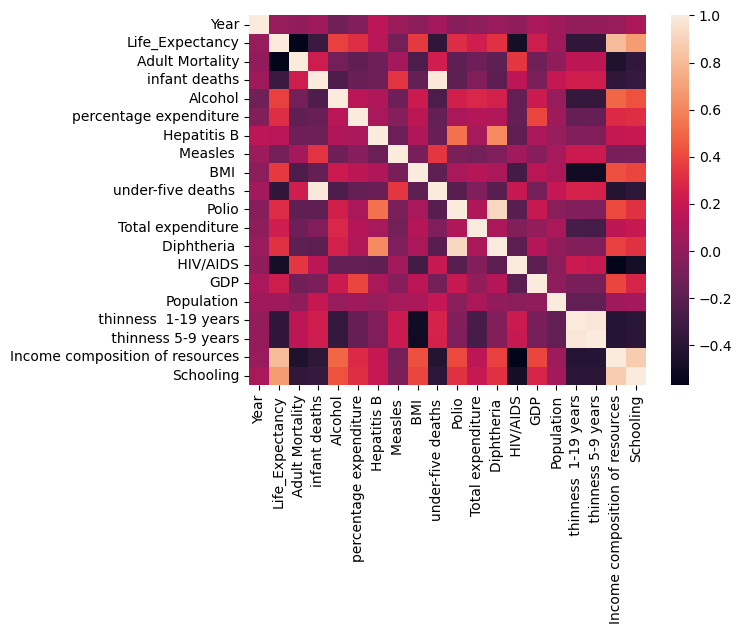

In [20]:
sns.heatmap(data=df.corr(), annot=False)
plt.show()

In [21]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

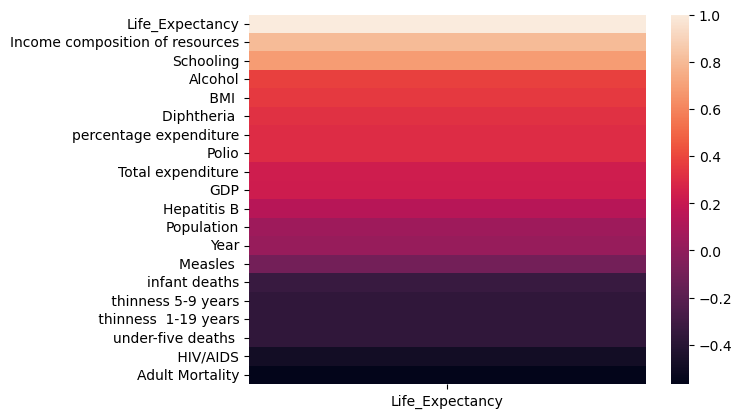

In [22]:
sns.heatmap(df.corr()[['Life_Expectancy']].sort_values(by='Life_Expectancy', ascending=False));

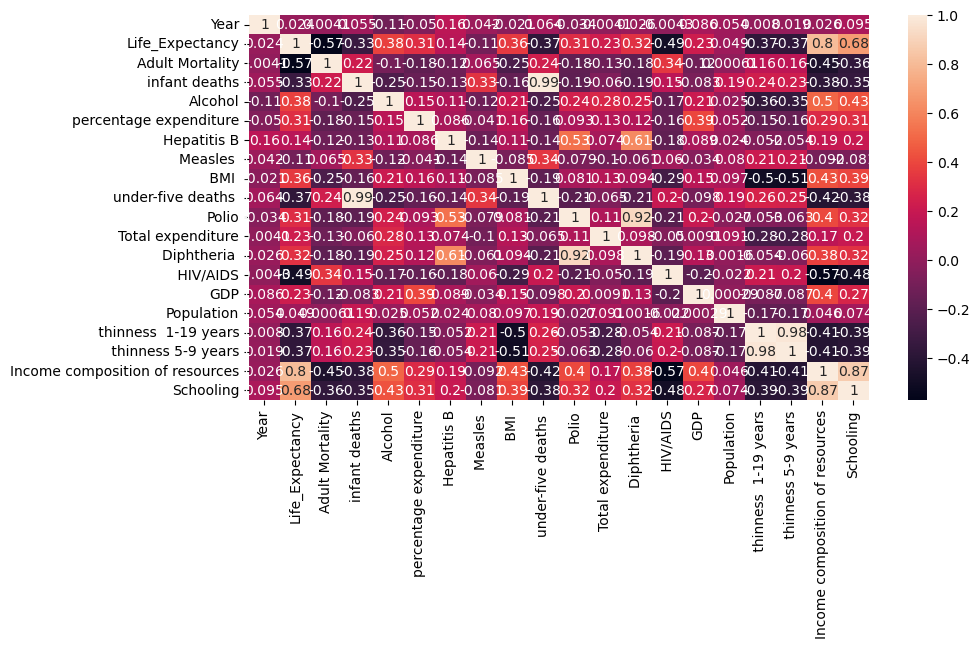

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
df.corr()[['Life_Expectancy']].sort_values(by='Life_Expectancy', ascending=False)

,Life_Expectancy
Life_Expectancy,1.00
Income composition of resources,0.80
Schooling,0.68
Alcohol,0.38
BMI,0.36
Diphtheria,0.32
percentage expenditure,0.31
Polio,0.31
Total expenditure,0.23
GDP,0.23


In [26]:
df.corr()

,Year,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.00,0.02,0.00,0.05,-0.11,-0.05,0.16,0.04,-0.02,0.06,-0.03,-0.00,0.03,-0.00,0.09,0.05,0.01,0.02,0.03,0.09
Life_Expectancy,0.02,1.00,-0.57,-0.33,0.38,0.31,0.14,-0.11,0.36,-0.37,0.31,0.23,0.32,-0.49,0.23,0.05,-0.37,-0.37,0.80,0.68
Adult Mortality,0.00,-0.57,1.00,0.22,-0.10,-0.18,-0.12,0.06,-0.25,0.24,-0.18,-0.13,-0.18,0.34,-0.12,0.00,0.16,0.16,-0.45,-0.36
infant deaths,0.05,-0.33,0.22,1.00,-0.25,-0.15,-0.13,0.33,-0.16,0.99,-0.19,-0.06,-0.19,0.15,-0.08,0.19,0.24,0.23,-0.38,-0.35
Alcohol,-0.11,0.38,-0.10,-0.25,1.00,0.15,0.11,-0.12,0.21,-0.25,0.24,0.28,0.25,-0.17,0.21,0.02,-0.36,-0.35,0.50,0.43
percentage expenditure,-0.05,0.31,-0.18,-0.15,0.15,1.00,0.09,-0.04,0.16,-0.16,0.09,0.13,0.12,-0.16,0.39,0.05,-0.15,-0.16,0.29,0.31
Hepatitis B,0.16,0.14,-0.12,-0.13,0.11,0.09,1.00,-0.14,0.11,-0.14,0.53,0.07,0.61,-0.18,0.09,0.02,-0.05,-0.05,0.19,0.20
Measles,0.04,-0.11,0.06,0.33,-0.12,-0.04,-0.14,1.00,-0.09,0.34,-0.08,-0.10,-0.06,0.06,-0.03,0.08,0.21,0.21,-0.09,-0.08
BMI,-0.02,0.36,-0.25,-0.16,0.21,0.16,0.11,-0.09,1.00,-0.19,0.08,0.13,0.09,-0.29,0.15,0.10,-0.50,-0.51,0.43,0.39
under-five deaths,0.06,-0.37,0.24,0.99,-0.25,-0.16,-0.14,0.34,-0.19,1.00,-0.21,-0.07,-0.21,0.20,-0.10,0.19,0.26,0.25,-0.42,-0.38


In [27]:
x=df[['Income composition of resources','Schooling']].values

In [28]:
y=df[['Life_Expectancy']].values

In [29]:
sc=StandardScaler()

In [30]:
x=sc.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### model building

In [32]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [33]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  3.350958830466182
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  3.350902574270615
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  3.352938749464761
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  4.593055123018731
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  3.431010660353145
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  3.567299145610341
************************************************

In [34]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),

}

In [35]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score =model.score(x_train, y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print('*'*100)

model trained with LinearRegression
r2score: 64.09167038981921
training_score: 64.78899997885577
testing_score: 64.09167038981921
mae: 2.3510055417857685
mse: 10.147463312662229
rmse_test: 3.185508328769873
****************************************************************************************************
model trained with Ridge
r2score: 64.12254040643177
training_score: 64.78851692989596
testing_score: 64.12254040643177
mae: 2.350263251246985
mse: 10.138739644242174
rmse_test: 3.1841387602053675
****************************************************************************************************
model trained with LinearSVR
r2score: 63.181031504062645
training_score: 64.23465257622047
testing_score: 63.181031504062645
mae: 2.3816563050987667
mse: 10.404804012845577
rmse_test: 3.225647843898273
****************************************************************************************************
model trained with Lasso
r2score: 62.705052197798004
training_score: 61.5210917237857
testin

#### Lazyprediction

In [36]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [37]:
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  5.19it/s]


In [38]:
model_dictionary = reg.provide_models(x_train, x_test, y_train, y_test)
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.73,0.73,2.77,0.02
GradientBoostingRegressor,0.72,0.72,2.82,0.06
HistGradientBoostingRegressor,0.71,0.71,2.86,0.30
LGBMRegressor,0.70,0.70,2.91,0.08
RandomForestRegressor,0.69,0.70,2.92,0.20
SVR,0.68,0.69,2.98,0.07
BaggingRegressor,0.68,0.69,2.98,0.03
NuSVR,0.68,0.68,2.99,0.06
ExtraTreesRegressor,0.67,0.67,3.05,0.15


In [39]:
model=GradientBoostingRegressor()

In [40]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [41]:
y_pred = model.predict(x)

In [42]:
PREDICTION = pd.DataFrame(zip(y, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,77.80,74.62
1,77.50,74.53
2,77.20,74.53
3,76.90,73.91
4,76.60,73.54
...,...,...
1059,64.40,65.14
1060,64.10,64.43
1061,63.80,63.31
1062,63.40,63.31


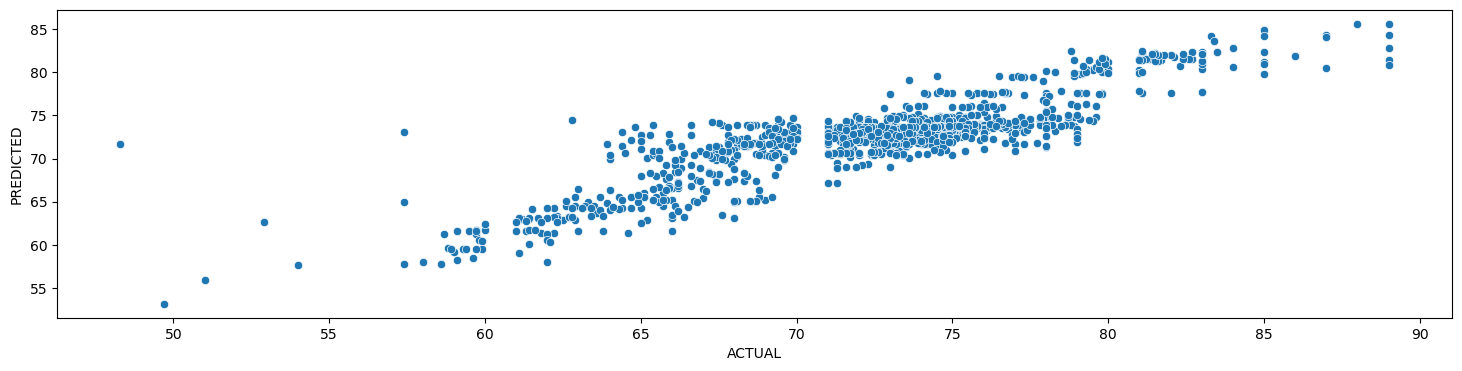

In [43]:
plt.figure(figsize=(18,4))
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()